## Matplotlib Tips

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
rcParams['figure.figsize'] = 15,10
%matplotlib inline

In [3]:
df = pd.DataFrame(
    [
        ['2014/01', 100, 100],
        ['2014/02', 120, 120],
        ['2014/03', 180, 180],
        ['2014/04', 100, 100],
        ['2014/05', 80, 90],
        ['2014/06', 70, 80],
        ['2014/07', 60, 70],
        ['2014/08', 70, 100],
        ['2014/09', 90, 130],
        ['2014/10', 80, 120],
        ['2014/11', 90, 130],
        ['2014/12', 100, 140],
    ],
    columns=['date', 'done', 'accept']
)

In [4]:
df['date'] = pd.to_datetime(df['date'])

### そのままで描画する場合

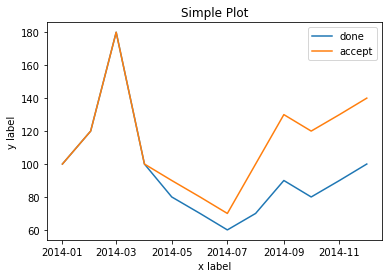

In [5]:
fig, ax = plt.subplots()
def line_plot_original(ax):
    ax.plot(df['date'], df['done'], label='done')
    ax.plot(df['date'], df['accept'], label='accept')
    ax.set_xlabel('x label')  # X軸にラベルを追加
    ax.set_ylabel('y label')  # Y軸にラベルを追加
    ax.set_title("Simple Plot")  # タイトルを追加
    ax.legend()  # 判例を追加
line_plot_original(ax)

### Google流資料作成術の方法を取り入れた場合

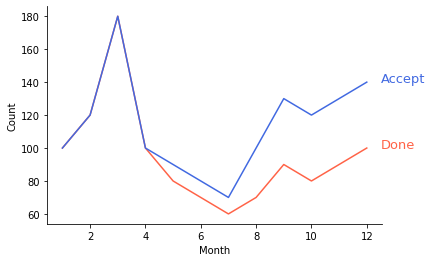

In [6]:
fig, ax = plt.subplots()
def line_plot(ax):
    df['month'] = df['date'].apply(lambda x: x.month )
    ax.plot(df['month'], df['done'], label='done', color='#ff6347')
    ax.plot(df['month'], df['accept'], label='accept', color='#4169e1')
    ax.spines['right'].set_visible(False) # 上の枠を消す
    ax.spines['top'].set_visible(False) # 右の枠を消す
    ax.set_xlabel('Month')  # X軸にラベルを追加
    ax.set_ylabel('Count')  # Y軸にラベルを追加
    ax.text(12.5, 100, "Done", size = 13, color = "#ff6347") # 凡例の代わりに折れ線の右側に添える
    ax.text(12.5, 140, "Accept", size = 13, color = "#4169e1")
line_plot(ax)

### スコアカードを作る

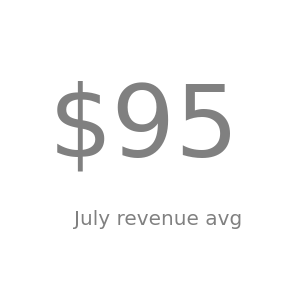

In [7]:
def scorecard(ax):
    number = f'${int(df["done"].mean())}'
    text = """
    July revenue avg
    """.strip()
    text_len_list = [len(i) for i in text.split('\n')]
    text_len = max(text_len_list)
    text_row_len = len(text_len_list)
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False)
    plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
    ax.text(0.15, 0.45, number , size = 100, color = "gray")
    ax.text(0.24, 0.2, text , size = 20, color = "gray")

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
scorecard(ax)

### Gridspecの使い方

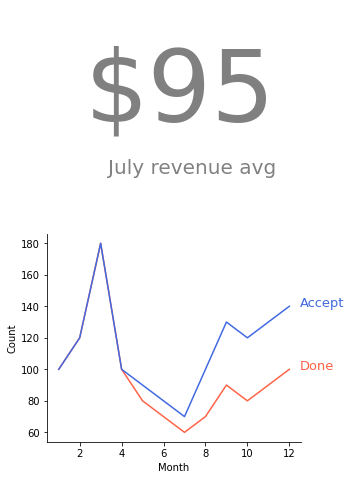

In [8]:
figure = plt.figure(figsize=(10, 8))
gs = GridSpec(nrows=4, ncols=2, height_ratios=[1, 1, 1, 1])
gs_sub = {}
axes = {}
gs_sub[0] = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs[0:2, 0])
axes[0] = figure.add_subplot(gs_sub[0][:, :])
scorecard(axes[0])
gs_sub[1] = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs[2:4, 0])
axes[1] = figure.add_subplot(gs_sub[1][:, :])
line_plot(axes[1])